# Lab 5 Notebook

Use this notebook to record your Lab 5 analysis.  You can add blocks of text for descriptive elements (choose the Markdown option from the dropdown menu), or blocks of code for analytical elements (choose the Code option).


In [423]:
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pylab
import sys; sys.path.append('/home/a180i/lib/python/')
import a180
import os

# Import the images taken

In [424]:
data_dir = '/data/2023-Spring/20230606afternoon/'

zero_point = plt.imread(data_dir+"exp_zeropoint.png")[:,:,0]
with_angle = plt.imread(data_dir+"exp_angle.png")[:,:,0]
focused_spot = plt.imread(data_dir+"exp4_focused_spots.png")[:,:,0]
plastic = plt.imread(data_dir+"exp6_plastic.png")[:,:,0]
amber = plt.imread(data_dir+"exp6_amber_board.png")[:,:,0]
converging_lens = plt.imread(data_dir+"exp6_converging_lens.png")[:,:,0]

# Experiment 1

A 25 mm lens is attached to a CMOS detector. A collimated light source is shined onto the lens. We verify the expected displacement $d$ of the spot image on the detector given a measured change in the angle of the input phase front.

$$d = f\tan\theta \approx f\theta$$

With an angle of $1.22^{\circ}$, the expected $d$ is 530 $\mu$m. Assuming a pixel scale of 6 $\mu$m, the expected displacement is 88 pixels on the detector. We will now obtain the actual $d$ measured in our experiment.

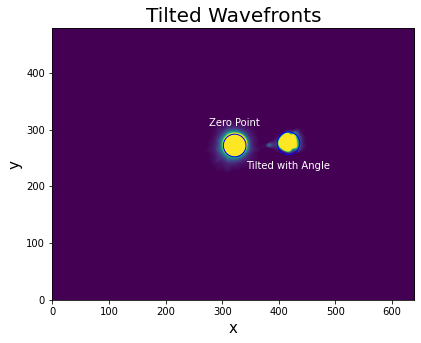

In [425]:
# Experiment 1

x1, y1 = 322, 272 # eyeball the center of the point source
x2, y2 = 417, 276

fig = pylab.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.imshow(zero_point+with_angle)

ax.text(x1, y1+40, "Zero Point",
            horizontalalignment='center',
            verticalalignment='center',
            color='white'
            )
ax.add_patch(mpl.patches.Circle((x1,y1), # center of the circle
                                    radius=20, # radius of the circle
                                    ec='b', # sets the circle edge color to blue
                                    fill=False, # does not fill the circle with color
                                   ))

ax.text(x2, y2-40, "Tilted with Angle",
            horizontalalignment='center',
            verticalalignment='center',
            color='white'
            )
ax.add_patch(mpl.patches.Circle((x2,y2), # center of the circle
                                    radius=20, # radius of the circle
                                    ec='b', # sets the circle edge color to blue
                                    fill=False, # does not fill the circle with color
                                   ))

ax.set_xlabel("x", fontsize=15)
ax.set_ylabel("y", fontsize=15)
ax.set_title("Tilted Wavefronts", fontsize=20)

plt.show()

In [426]:
# measured displacement on the detector

dx = x2-x1 # [pixels]
# convert displacement to SI units, assuming pixel scale of 6 micrometers/pixel
dx_length = dx*6 # [mu m]
print(dx, dx_length)

95 570


# Experiment 2

A lenslet-based Shack-Hartmann device translates local phase gradients to spot displace- ments. For a flat incoming wavefront as shown in the left panel, the lenslets focus the light to a regular array of spots.

We investigate the effects on the patterns when a focused beam of light passes through a ThorLabs MLA300-14AR device, which consists of a 10 mm x 10 mm grid containing microlenses arranged with a spacing of 300 micrometers. Each microlens in the array has a focal length of 14 mm. The light is then projected onto a CMOS detector that has an array of 752 x 480 pixels, with each pixel measuring 6.0 micrometers in size.

In [427]:
# Experiment 2

# Q3

pitch = 300 #[mu m]
pixel_width = 6 #[mu m]

num_of_pixels_btw_spots = pitch/pixel_width #[pixels]

num_of_spots_x = 752//num_of_pixels_btw_spots + 1
num_of_spots_y = 480//num_of_pixels_btw_spots + 1

num_of_spots_total = num_of_spots_x * num_of_spots_y

print(num_of_pixels_btw_spots, num_of_spots_total)

50.0 160.0


# Experiment 3

With the given optical relay that image the spots onto the detector, we are able to demagnify to more densely pack the spots onto the CMOS detector.

In [428]:
# Q4

# focal lengths of the optics in the relay
f1 = 14 # [mm]
f2 = 75 # [mm]
f3 = 25 # [mm]

m1 = f1/f2 # the magnification between first and second lens 
m2 = f2/f3 # the magnification between second and third lens 

M = abs(m1*m2) # total magnification of the optical relay

spacing_btw_spots_length = M*pitch #[mu m]
spacing_btw_spots_pixels = spacing_btw_spots_length/pixel_width #[pixels]

print(spacing_btw_spots_length, spacing_btw_spots_pixels)

# Q5
displace = 530 # [mu m], the physical spot displacement from experiment 1

detector_displace = displace*M #[mu m]
print(detector_displace)

# Q6
# detector displacement as a fraction of the spacing between spots
print(detector_displace/spacing_btw_spots_length) 

168.00000000000003 28.000000000000004
296.8
1.7666666666666664


# Experiment 4

We obtained an image of the focused spots on the CMOS detector. Here we compute the distance between the spots in pixels.

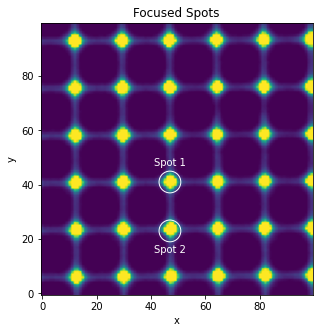

18

In [429]:
x1, y1 = 47, 41 # eyeball the center of the spots
x2, y2 = 47, 23

fig = pylab.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.imshow(focused_spot[200:300,200:300]) # zoom in the image of focused spots

ax.text(x1, y1+7, "Spot 1",
            horizontalalignment='center',
            verticalalignment='center',
            color='white'
            )
ax.add_patch(mpl.patches.Circle((x1,y1), # center of the circle
                                    radius=4, # radius of the circle
                                    ec='w', # sets the circle edge color to blue
                                    fill=False, # does not fill the circle with color
                                   ))

ax.text(x2, y2-7, "Spot 2",
            horizontalalignment='center',
            verticalalignment='center',
            color='white'
            )
ax.add_patch(mpl.patches.Circle((x2,y2), # center of the circle
                                    radius=4, # radius of the circle
                                    ec='w', # sets the circle edge color to blue
                                    fill=False, # does not fill the circle with color
                                   ))

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Focused Spots")

plt.show()

y1-y2 # differ by this amount of pixels

# Experiment 6

By passing the collimated light through some sources of aberration (we used plastic, amber, and a converging lens), we examine their effect on spot displacements.

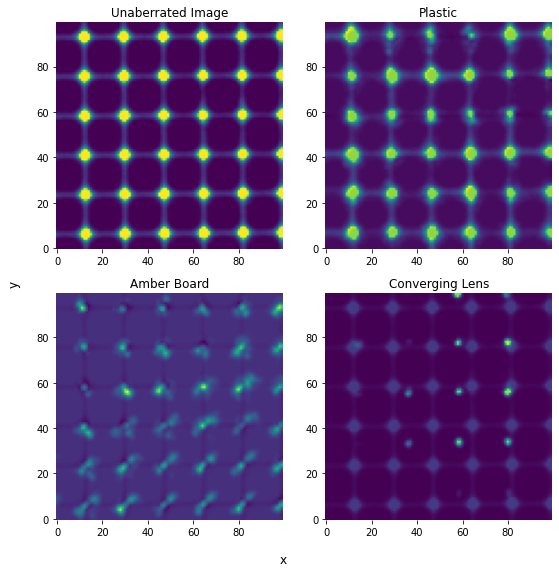

In [430]:
x1, x2, y1, y2 = 200, 300, 200, 300 # zooming into the image to see the displacement effect

fig = pylab.figure(figsize=(8,8))
ax1 = fig.add_subplot(221, frameon=False)
ax2 = fig.add_subplot(222, frameon=False)
ax3 = fig.add_subplot(223, frameon=False)
ax4 = fig.add_subplot(224, frameon=False)
ax1.imshow(focused_spot[y1:y2, x1:x2]) # zoom in the image of focused spots
ax2.imshow(plastic[y1:y2, x1:x2]-focused_spot[y1:y2, x1:x2]/5)
ax3.imshow(amber[y1:y2, x1:x2]-focused_spot[y1:y2, x1:x2]/5)
ax4.imshow(focused_spot[y1:y2, x1:x2]/5+converging_lens[y1:y2, x1:x2]**2)

ax1.set_title("Unaberrated Image")
ax2.set_title("Plastic")
ax3.set_title("Amber Board")
ax4.set_title("Converging Lens")

fig.supxlabel("x")
fig.supylabel("y")

plt.tight_layout()
plt.show()

We focus on the spot displacement effects of the converging lens because it displays radial dependence.

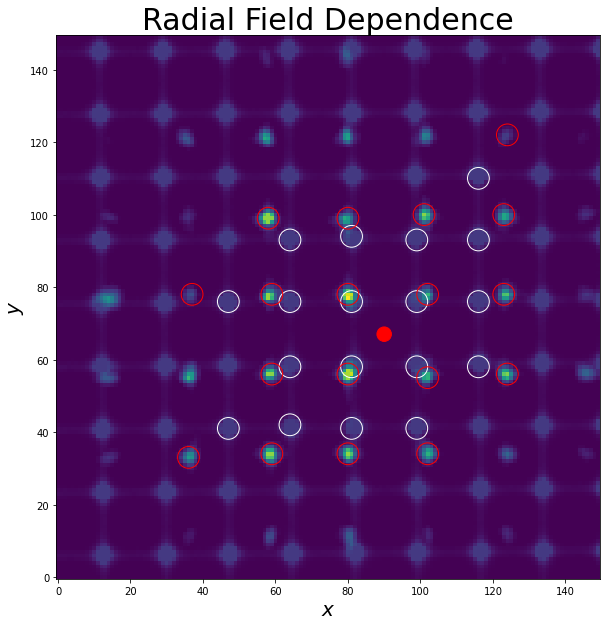

In [431]:
x1, x2, y1, y2 = 200, 250, 200, 250 # zooming into the image to see the displacement effect

originx, originy = 90, 67

# eyeball the coordinates of the spots
refx = np.array([81-17*2, 81-17, 81, 81+18, 81+18*2-1, 81, 81+18, 81+35, 81-17, 81-17*2, 81-17, 81+18, 81, 81+18*2-1, 81+18*2-1, 81, 81+18, 81-17])
refy = np.array([76-17*2-1, 76-18, 76, 76+17, 76+17*2, 76-18, 76, 76+17, 76-17*2, 76, 76, 76-18, 76+18, 76, 76-18, 76-18*2+1, 76-18*2+1, 76+17])

spotx = np.array([81-17*2-11, 81-22, 81-1, 81+20, 81+18*2+7, 80, 81+21, 81+21*2, 81-22, 81-17*2-10, 81-22, 81+21, 81-1, 81+17*2+8, 81+17*2+9, 80, 81+21, 81-23])
spoty = np.array([76-17*2-9, 76-20, 76+2, 76+24, 76+17*2+12, 76-20, 78, 76+24, 76-42, 76+2, 76+2, 76-21, 76+23, 76+2, 76-20, 76-21*2, 76-20*2-2, 76+23])

# compute the distances
dist_to_ref = np.sqrt((refx-originx)**2 + (refy-originy)**2)
ref_dist_to_spot = np.sqrt((refx-spotx)**2 + (refy-spoty)**2)

fig = pylab.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.add_patch(mpl.patches.Circle((originx, originy), radius=2, color='r', fill=True))

for i in range(len(refx)):
    ax.add_patch(mpl.patches.Circle((refx[i], refy[i]), radius=3, ec='w', fill=False))
    ax.add_patch(mpl.patches.Circle((spotx[i], spoty[i]), radius=3, ec='r', fill=False))

ax.imshow(focused_spot[a:b, a:b]/5+converging_lens[a:b, a:b])

ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.set_title("Radial Field Dependence", fontsize=30)

plt.show()

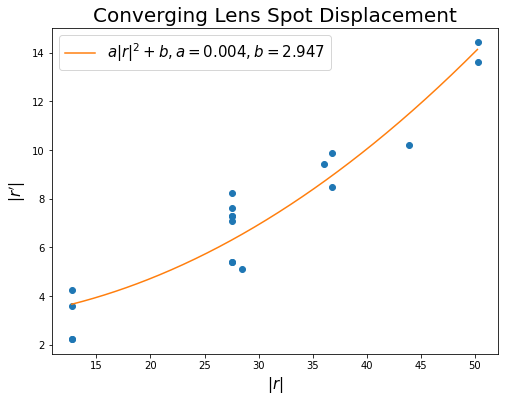

In [432]:
from scipy.optimize import curve_fit

def func(x, a, b): # model the displacement with a quadratic function
    return a*x**2 + b

popt, pcov = curve_fit(func, dist_to_ref, ref_dist_to_spot) # curve fit

xnew = np.arange(min(dist_to_ref), max(dist_to_ref), 0.1)

plt.figure(figsize=(8, 6))
plt.plot(dist_to_ref, ref_dist_to_spot, marker='o', linestyle="")
plt.plot(xnew, func(xnew, *popt), label="$a|r|^2+b, a=%.3f, b=%.3f$" % (popt[0], popt[1]))
plt.legend(fontsize=15)
plt.ylabel('$|r^{\prime}|$', fontsize=15)
plt.xlabel('$|r|$', fontsize=15)
plt.title("Converging Lens Spot Displacement", fontsize=20)
plt.show()
